By The End Of This Session You Should Be Able To:
----

- Explore data with Pandas to answer conceptual questions
- Write chained commands for effecient one-liners
- Use variables to _D.R.Y. out your code_

Load the `trips` data into a dataframe.  

In [79]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [80]:
trips = pd.read_csv('data/bike_share_201402_trip_data.csv')
trips.head()

,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscription Type,Zip Code
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214
3,4251,77,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060
4,4299,83,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103


How many observations are there?

In [81]:
trips.shape

(144015, 11)

Change the columns to be Pythonic:

- lowercase 
- replace " " with `_` as a separator
- replace "#" with `num` 

<br>

<details><summary>
Click here for a hint…
</summary>
http://nbviewer.jupyter.org/github/rasbt/python_reference/blob/master/tutorials/things_in_pandas.ipynb#Renaming-Columns
</details>

In [82]:
trips.columns = trips.columns.str.replace(" ", "_")
trips.columns = trips.columns.str.replace("#", "num")
trips.columns = trips.columns.str.lower()
trips.columns

Index(['trip_id', 'duration', 'start_date', 'start_station', 'start_terminal',
       'end_date', 'end_station', 'end_terminal', 'bike_num',
       'subscription_type', 'zip_code'],
      dtype='object')

How many types of subscription options are there?

In [83]:
len(trips.subscription_type.unique())

2

What is the frequency of each subscription option?

In [84]:
subtyo = list()
for idx, x in enumerate(trips.subscription_type.unique()):
    subtyo.append(trips[trips.subscription_type == x].subscription_type.count())
    print(subtyo[idx])

113647
30368


Please plot the frequency of each subscription option with pie chart:

([<matplotlib.patches.Wedge at 0x122e2d898>,
 [Text(-0.8673310911259287, 0.6765624718873389, 'Subscriber'),
  Text(0.8673310911259287, -0.676562471887339, 'Customer')])

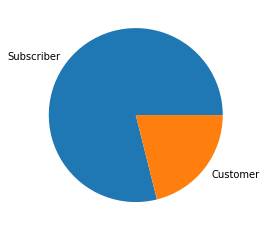

In [85]:
plt.pie(subtyo, labels = trips.subscription_type.unique())

Please plot the frequency of each subscription option with bar chart:

<BarContainer object of 2 artists>

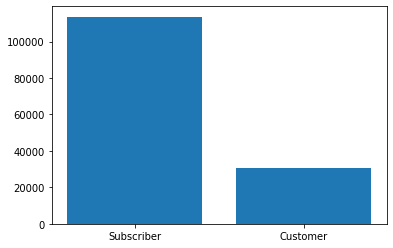

In [86]:
plt.bar(x = trips.subscription_type.unique(), height = subtyo)

Repeat same analysis for start_station but sorted from high to low.

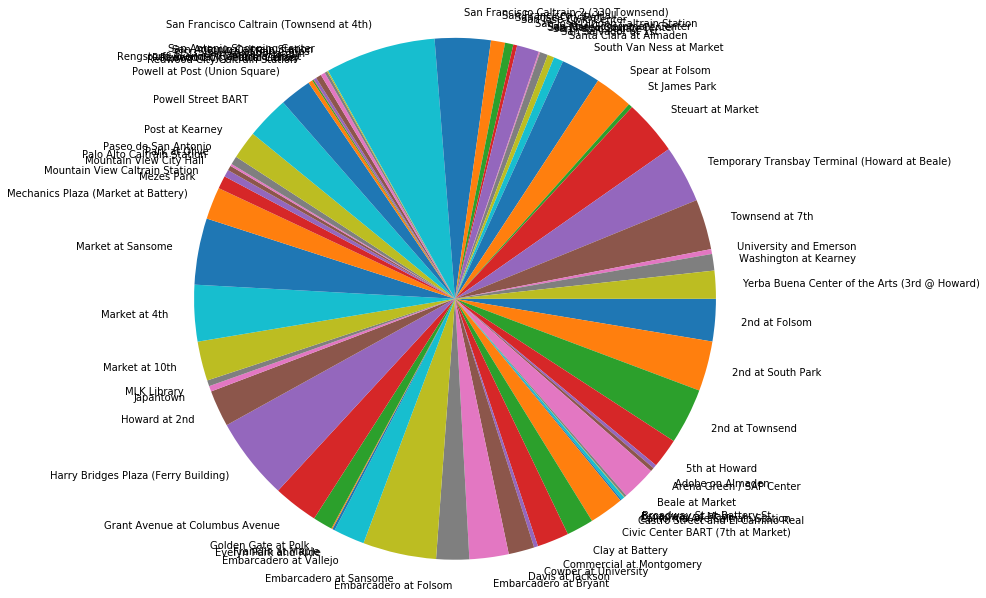

In [87]:
ststtyo = list()
tripssa = trips.sort_values('start_station')

for idx, x in enumerate(tripssa.start_station.unique()):
    ststtyo.append(tripssa[tripssa.start_station == x].start_station.count())
    #print(ststtyo[idx])
#tripssa
plt.pie(ststtyo, labels = tripssa.start_station.unique(), radius = 3, counterclock = False);

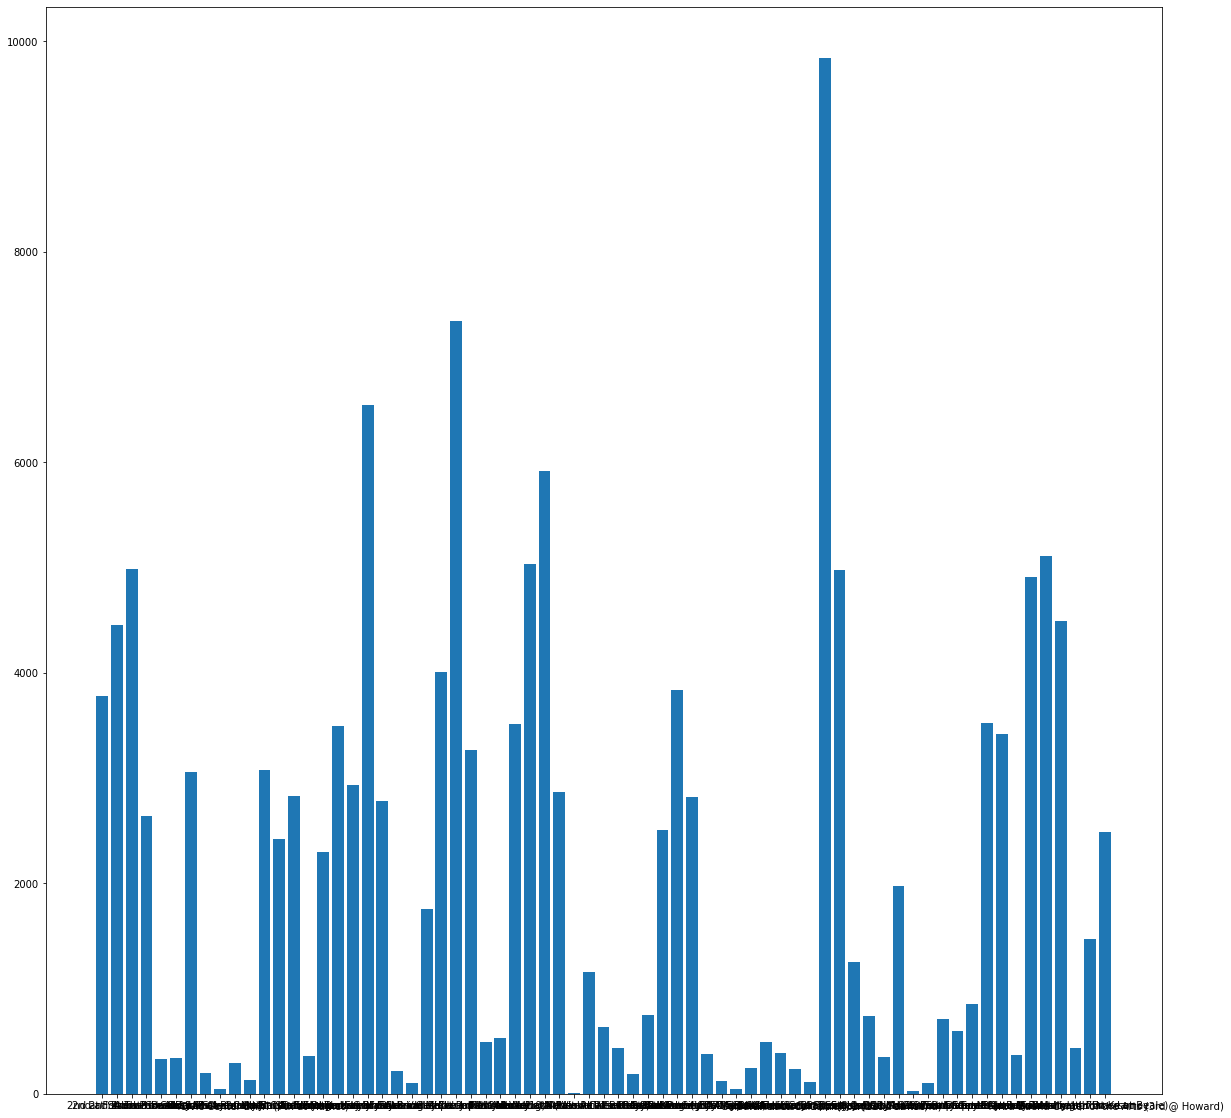

In [88]:
plt.figure(figsize=(20,20))
plt.bar(x = tripssa.start_station.unique(), height = ststtyo,);

Repeat same analysis for end_station but sorted from __low to high__.

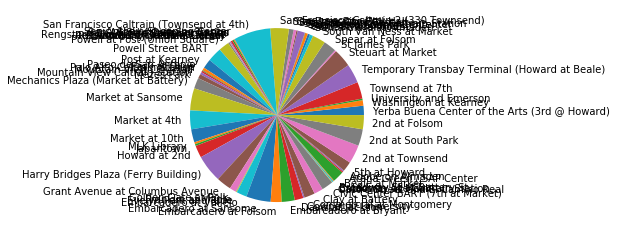

In [89]:
ststtyo = list()
tripssd = trips.sort_values('start_station', ascending = False)
for idx, x in enumerate(tripssd.start_station.unique()):
    ststtyo.append(tripssd[tripssd.start_station == x].start_station.count())
    #print(ststtyo[idx])
#tripssa
plt.pie(ststtyo, labels = tripssd.start_station.unique());

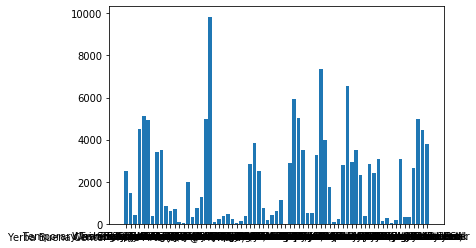

In [97]:
plt.bar(x = tripssd.start_station.unique(), height = ststtyo);

Looking at just most popular stations, what are the qualitative similarities and differences between start and end stations?

In [143]:
ensttyo = list()
tripsen = trips.sort_values('start_station')
dicten = dict()
#count loop with dict

# technically need to first completely add and then reduce using unique and then plot
for idx, x in enumerate(tripsen.end_station):#.unique()):
    if not {x}.issubset(dicten):
        counter = tripsen[tripsen.end_station == x].end_station.count()
        ensttyo.append(counter)
        dicten[x] = counter
    else:
        ensttyo.append(dicten[x])
    #print(ststtyo[idx])
tripsen['end_station_count'] = ensttyo
tripsen = tripsen.sort_values('end_station_count')
#print(tripsen.columns)
#tripsenu = tripsen['end_station'].unique()
tripsenu = set()
tripsenul = list()
ensttyo = set()
ensttyol = list()
for [x, y] in [tripsen['end_station'], tripsen['end_station_count']:
    print(x, y)
    if not {x}.issubset(tripsenu):
        tripsenu.update(x)
        ensttyo.update(y)
        tripsenul.append(x)
        ensttyol.append(y)
#tripsenu
#tripsen
#tripsen.loc['end_station']


ValueError: too many values to unpack (expected 2)

In [116]:
ststtyo = list()
tripssa = trips.sort_values('start_station')
dictsa = dict()

# technically need to first completely add and then reduce using unique and then plot
for idx, x in enumerate(tripssa.start_station):#.unique()):
    if not {x}.issubset(dictsa):
        counter = tripssa[tripssa.start_station == x].start_station.count()
        ststtyo.append(counter)
        dictsa[x] = counter
    else:
        ststtyo.append(dictsa[x])
    #print(ststtyo[idx])
tripssa['start_station_count'] = ststtyo
tripssa = tripssa.sort_values('start_station_count')
tripssau = tripsen['start_station'].unique()

#tripsenu.shape
#tripssa
tripsenu.end_station_count
#plt.pie(tripsenu.end_station_count, labels = tripsenu.end_station, radius = 3, counterclock = False);
# ststtyo, tripssa


AttributeError: 'numpy.ndarray' object has no attribute 'end_station_count'

Create a table that has start_station segmented by subscription_type.

Include the marginals
<br>
<br>
<details><summary>
Click here for a hint…
</summary>
`pd.crosstab`
</details>

-----

Let's look at duration....

How long is the shortest trip? How many are that short?

What do you think is going on with the shrort trips?

What is the longest trip? How many trips are "long"?

Do the long durations seem reasonable? Why are they so long? What could that tell us about the users?

Timebox 15 minutes to explore the data guided by your own intuition or hypotheses…

Be prepared to show something to the rest of class.

-----
Challenge Exercises
-----

Plot duration

Does that plot give insights?

Select subsections of the data to make a series of plots to enable insights for the Product Team

The Product Team would like all of the station names to be lower case and  with `_` as a seperator

`South Van Ness at Market` -> `south_van_ness_at_market`  

__DO NOT USE A FOR LOOP. THEY ARE THE 👿__

<br>
<br> 
<br>

----